In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
import helpertests as tst
import sparsedense as spd
import optim

In [6]:
Z = optim.sample_from_ibp(846, alpha=5., sigma=0.75, c=25)
net = Z.transpose() @ Z
K, N = Z.shape
links = []
for i in range(N - 1):
    for j in range(i + 1, N):
        if net[i, j] >= 1:
            links.append([i, j])

g = nx.Graph()
g.add_edges_from(links)
tst.test_stats(g)

- num nodes: 2189
- num edges: 9814
- edge node ratio: 4.48
- density: 0.004098
- mean degree: 8.97
- mean maximal clique containing node: 6.39
- clustering coefficient: 0.87
- connected component sizes (top 5): [2107, 8, 4, 4, 4]
- mean distance between nodes (largest conn. comp.): 3.22


In [8]:
links_true = np.genfromtxt('imdb.tsv', delimiter='\t', dtype=int)
g_true = nx.Graph()
g_true.add_edges_from(links_true)
tst.test_stats(g_true)

- num nodes: 2288
- num edges: 5232
- edge node ratio: 2.29
- density: 0.002000
- mean degree: 4.57
- mean maximal clique containing node: 4.29
- clustering coefficient: 0.80
- connected component sizes (top 5): [2288]
- mean distance between nodes (largest conn. comp.): 11.27


(0, 30)

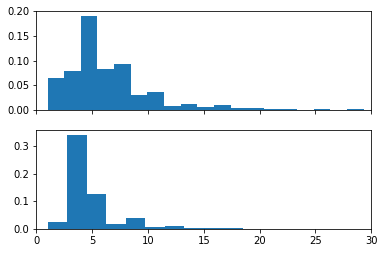

In [16]:
fig, ax = plt.subplots(2, 1, sharex=True)

deg = np.array([nx.degree(g, i) for i in g.nodes()])
deg_true = np.array([nx.degree(g_true, i) for i in g_true.nodes()])

ax[0].hist(deg, 300, density=True)
ax[1].hist(deg_true, 20, density=True)

plt.xlim(0, 30)

In [12]:
len(deg[np.where(deg == 1)])

47

In [13]:
len(deg_true[np.where(deg_true == 1)])

2

(0, 15)

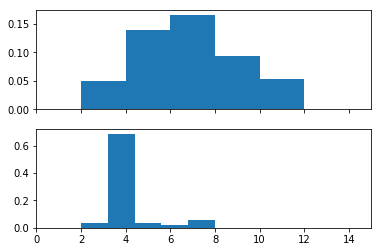

In [17]:
fig, ax = plt.subplots(2, 1, sharex=True)

clique = np.array([nx.node_clique_number(g, i) for i in g.nodes()])
clique_true = np.array([nx.node_clique_number(g_true, i) for i in g_true.nodes()])

ax[0].hist(clique, 5, density=True)
ax[1].hist(clique_true, 5, density=True)

plt.xlim(0, 15)

(0, 5)

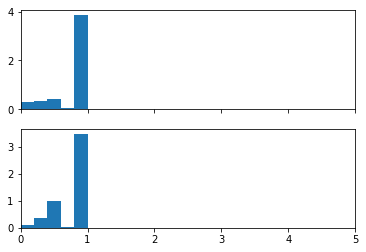

In [18]:
fig, ax = plt.subplots(2, 1, sharex=True)

clustering = np.array([nx.clustering(g, i) for i in g.nodes()])
clustering_true = np.array([nx.clustering(g_true, i) for i in g_true.nodes()])

ax[0].hist(clustering, 5, density=True)
ax[1].hist(clustering_true, 5, density=True)

plt.xlim(0, 5)